In [0]:
import numpy as np
from scipy.sparse import lil_matrix, csr_matrix, identity
import seaborn as sns

In [0]:
# hardcode lower left points of houses on grid
small_houses = [(69,111),(69,264),
          (138,12),(138,165),
          (192,111),(192,264),
          (261,12),(261,165)]
long1_houses = [(69,12),(69,165),
            (192,12),(192,165)]

long2_houses = [(138,51),(138,204),
            (261,51),(261,204)]

In [0]:
# define hyperparameters
N = 300
NUM_OF_STEPS = 50000
K = 0.5
H = 1/N
TAU = H**2 / (K * 4)
LMBD_1 = 1.0
LMBD_2 = 0
DX = [1, -1, 0, 0]
DY = [0, 0, 1, -1]

In [0]:
def house_or_edge(x_coord,y_coord):
  if x_coord > 299 or y_coord > 299 or y_coord == 0:
    return True
  for h in long1_houses:
    x_cur = h[0]
    y_cur = h[1]
    if x_cur < x_coord and x_coord < x_cur + 18 and y_cur < y_coord and y_coord < y_cur + 78:
      return True
    x_cur += 12
    if (x_cur < x_coord and x_coord < x_cur + 12 and y_cur < y_coord and y_coord < y_cur + 18):
      return True
  for h in long2_houses:
    x_cur = h[0]
    y_cur = h[1]
    if x_cur < x_coord and x_coord < x_cur + 18 and y_cur < y_coord and y_coord < y_cur+78:
      return True
    x_cur -= 12
    y_cur += 60
    if (x_cur < x_coord and x_coord < x_cur + 13 and y_cur < y_coord and y_coord < y_cur + 18):
      return True
  for h in small_houses:
    x_cur = h[0]
    y_cur = h[1]
    if (x_cur < x_coord and x_coord < x_cur + 18 and y_cur < y_coord and y_coord < y_cur + 18):
      return True
  return False

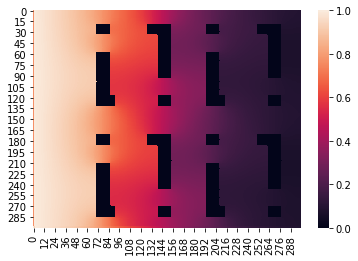

In [30]:
def solve(epsilon):
  num_cells = N * N
  A = lil_matrix((num_cells, num_cells))
  b = np.zeros(num_cells)
  X = np.zeros((num_cells, 1))
  for i in range(300):
    X[300*i,0]=1  

  uc = 1-4*(TAU*K)/(H**2)
  c = [TAU*(K/(H**2)-LMBD_1/(2*H)),
            TAU*(K/(H**2)+LMBD_1/(2*H)),
            TAU*(K/(H**2)-LMBD_2/(2*H)),
            TAU*(K/(H**2)+LMBD_2/(2*H))]

  for i in range(N): 
      for j in range(N):
          index = i*N+j
          A[index,index] = uc
          for l in range(4):
              x_coord = i + DX[l]
              y_coord = j + DY[l]
              cf = c[l]
              if x_coord==0:
                  b[index] -= cf
              elif house_or_edge(x_coord,y_coord):
                  A[index,index] += cf
              else:
                  A[index,x_coord*300+y_coord] = cf

  A = csr_matrix(A)
  b = b.reshape(num_cells, -1)
  for i in range(NUM_OF_STEPS):
    X_new = (A * X + b)
    err = np.max(np.abs(X_new - X))
    if err < epsilon:
        break
    X = X_new
  X = X.reshape((300,300))
  return -np.rot90(X)

result = solve(1e-10)
sns.heatmap(result)